In [1]:
#Importing libararies
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings
import math
import random
import scipy.stats
warnings.filterwarnings('ignore')

In [2]:
random.seed(2020)

In [3]:
#Change the directory name
os.chdir('C:/Users/ssahi/Documents/ML_Course/Assignment_1')

## Data Preprocessing

In [4]:
#Reading the data
df = pd.read_csv("sgemm_product.csv")
df.shape

(241600, 18)

In [5]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [7]:
#Checking for missing values
df.isnull().sum()

#there are no missing values

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [8]:
#Taking the average of runs for target variable
df["avg_run"] = df.iloc[:,14:].mean(axis = 1)

#Taking log of the Average run times
df["log_avg_run"] = np.log(df.avg_run) 

#Dropping the four Run columns
df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], axis = 1, inplace = True)

df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_run,log_avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,4.756775
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,4.365707
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,4.389064
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,4.461733
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,4.776283


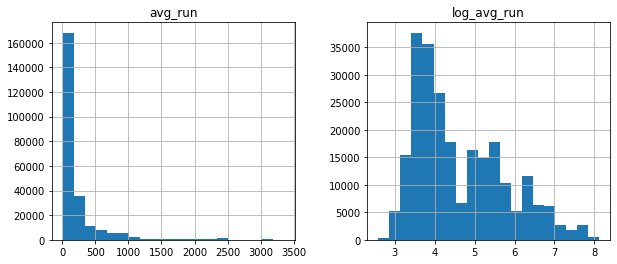

In [9]:
plt.rcParams['figure.figsize'] = (10, 4)
run_time_cols = ["avg_run","log_avg_run"]
run_times=df[run_time_cols]
run_times.hist(bins = 20) ;

In [10]:
#Dropping the Average run column
df.drop(['avg_run'], axis = 1, inplace = True)

Text(0.5, 1.0, 'Average Run Time distribution')

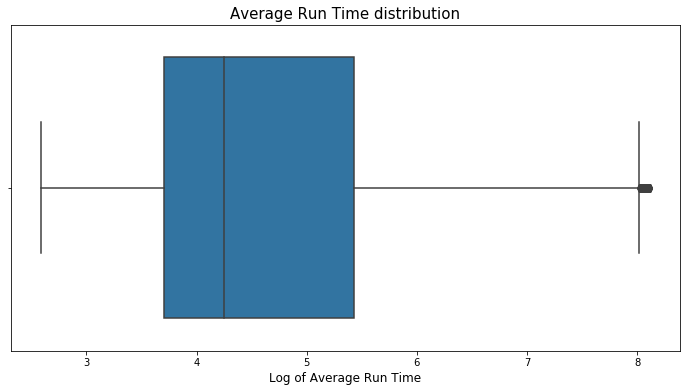

In [11]:
# Find outliers
plt.rcParams['figure.figsize'] = (12, 6)
sns.boxplot(x="log_avg_run", data=df)
plt.xlabel('Log of Average Run Time', fontsize=12)
plt.title("Average Run Time distribution", fontsize=15)

In [12]:
#Deleting outliers
df = df[df['log_avg_run'] <= 8]

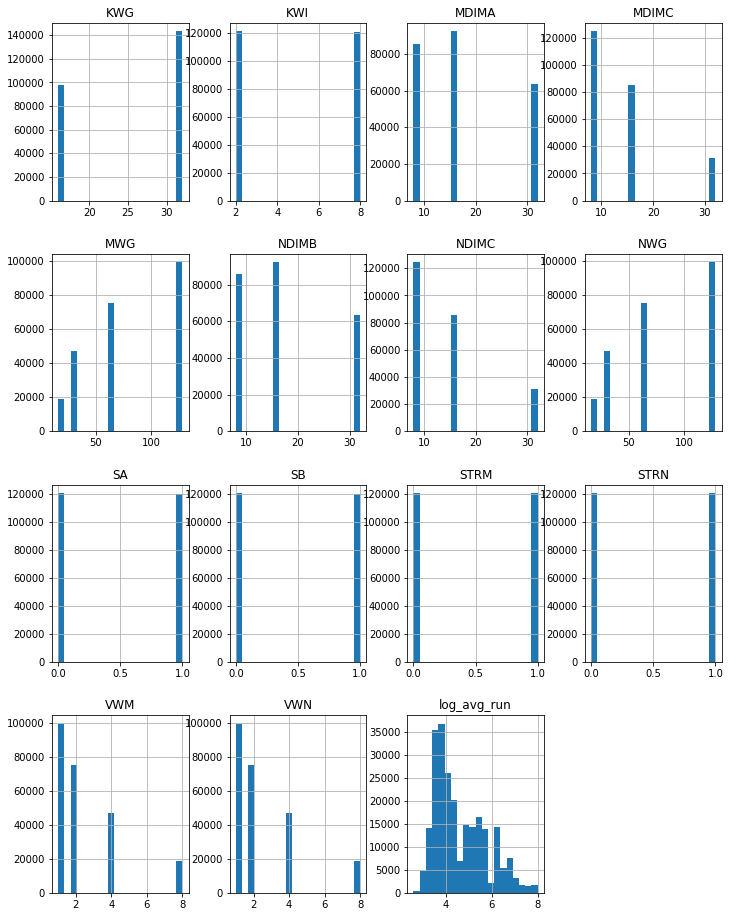

In [13]:
# Histogram of all the features to understand the distribution
df.hist(bins = 20 , figsize= (12,16)) ;

## Scaling and Dividing into Training and Test Sets

In [14]:
#Normalize using StandardScaler function
sc_data = StandardScaler()
LineReg = sc_data.fit_transform(df)
LineReg = pd.DataFrame(LineReg)
LineReg.columns = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI',
       'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB', 'log_avg_run']

In [15]:
LineReg.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_avg_run
0,-1.514916,-1.514916,-1.208972,-0.755071,-0.755071,-0.998068,-0.99807,-0.998011,-0.741098,-0.741098,-1.000017,-1.000017,-0.998011,-0.998011,0.125565
1,-1.514916,-1.514916,-1.208972,-0.755071,-0.755071,-0.998068,-0.99807,-0.998011,-0.741098,-0.741098,-1.000017,-1.000017,-0.998011,1.001993,-0.223847
2,-1.514916,-1.514916,-1.208972,-0.755071,-0.755071,-0.998068,-0.99807,-0.998011,-0.741098,-0.741098,-1.000017,-1.000017,1.001993,-0.998011,-0.202978
3,-1.514916,-1.514916,-1.208972,-0.755071,-0.755071,-0.998068,-0.99807,-0.998011,-0.741098,-0.741098,-1.000017,-1.000017,1.001993,1.001993,-0.138050
4,-1.514916,-1.514916,-1.208972,-0.755071,-0.755071,-0.998068,-0.99807,-0.998011,-0.741098,-0.741098,-1.000017,0.999983,-0.998011,-0.998011,0.142995


In [16]:
#Setting the matrixes

# X is the feature matrix with all the 14 independent features and the first column as all 1s for the intercept cofficient
X = LineReg.iloc[:,0:14]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

# Y is the target variable matrix with just one column
Y = LineReg.iloc[:,14:].values 

# Initialising the beta values with all zeroes.
beta_strt = np.zeros([1,15])

print("Shape of Feature matrix:", X.shape)
print("Shape of Target matrix:", Y.shape)
print("Initial beta values:", beta_strt)

Shape of Feature matrix: (241120, 15)
Shape of Target matrix: (241120, 1)
Initial beta values: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
X

array([[ 1.        , -1.5149157 , -1.5149157 , ..., -1.00001659,
        -0.99801127, -0.99801127],
       [ 1.        , -1.5149157 , -1.5149157 , ..., -1.00001659,
        -0.99801127,  1.0019927 ],
       [ 1.        , -1.5149157 , -1.5149157 , ..., -1.00001659,
         1.0019927 , -0.99801127],
       ...,
       [ 1.        ,  1.12297108,  1.12297108, ...,  0.99998341,
        -0.99801127,  1.0019927 ],
       [ 1.        ,  1.12297108,  1.12297108, ...,  0.99998341,
         1.0019927 , -0.99801127],
       [ 1.        ,  1.12297108,  1.12297108, ...,  0.99998341,
         1.0019927 ,  1.0019927 ]])

In [18]:
Y

array([[ 0.12556464],
       [-0.22384737],
       [-0.20297777],
       ...,
       [-0.94381245],
       [-1.13293835],
       [-1.55113665]])

In [19]:
beta_strt

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
#Splitting the data into training and test set by 80-20 division
X_train_exp1,X_test_exp1,y_train_exp1,y_test_exp1 = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## Linear Regression Functions

In [46]:
#Calculate cost
def calculateCost(X,Y,beta):
    summation = np.power(((X @ beta.T)-Y),2)
    finalCost = np.sum(summation)/(2 * len(X))
    return finalCost

In [47]:
#Implement batch gradient descent with convergence threshold = 0.0000001
def gradientDescent(X,Y,beta,iters,alpha):
    cost = np.zeros(iters)
    diff = 1
    convg = 0
    for i in range(iters):
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost[i] = calculateCost(X, Y, beta)
        if diff > 0.0000001:    
            if i==0:
                diff = cost[i]
            else:
                diff = abs(cost[i] - cost[i-1])
                if diff <= 0.0000001:
                    convg = i
    return beta,cost,convg

In [48]:
#Implement batch gradient descent with convergence threshold as input
def gradientDescentThresh(X,Y,beta,alpha,thresh,iters=5000):
    cost = []
    diff = 1
    convg = 0
    while diff > thresh:
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost.append(calculateCost(X, Y, beta))
        if len(cost)==1:
            diff = cost[0]
        else:
            diff = abs(cost[-1] - cost[-2])
            if diff <= thresh:
                convg = len(cost)
    return beta,cost,convg

In [49]:
#Implement batch gradient descent with convergence threshold as input
#Calculate Test and Train dataset MSE at each iteration
def gradientDescentItersMSE(X,Y,X_test,Y_test,beta,alpha,thresh,iters=5000):
    Test_err = []
    Train_err = []
    cost = []
    diff = 1
    convg = 0
    while diff > thresh:
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost.append(calculateCost(X, Y, beta))
        
        y_hat_test = predict(X_test,beta)
        y_hat_train = predict(X,beta)
        
        Test_MSE = calculateMSE(Y_test,y_hat_test)
        Train_MSE = calculateMSE(Y,y_hat_train)
        
        Test_err.append(Test_MSE)
        Train_err.append(Train_MSE)
        
        if len(cost)==1:
            diff = cost[0]
        else:
            diff = abs(cost[-1] - cost[-2])
            if diff <= thresh:
                convg = len(cost)
    return Test_err,Train_err,convg

In [50]:
#Calculate predicted Y
def predict(X,beta):
    Y_hat = X.dot(beta.T)
    return Y_hat

In [51]:
#Calculate MSE
def calculateMSE(Y, Y_hat):
    MSE = (np.sum((Y - Y_hat) ** 2) / len(Y));
    return MSE;

In [52]:
#Calculate R-squared
def calculateRSquared(Y, Y_hat):
    Y_mean = np.mean(Y)
    residualSSE = np.sum((Y - Y_hat) ** 2)
    totalSSE = np.sum((Y - Y_mean) ** 2)
    rSquared = 1 - (residualSSE / totalSSE)
    return rSquared

In [53]:
def printResults(X,Y,X_test,Y_test,beta,iters,alpha):
    print("Alpha:",alpha)
    beta_cal,cost_cal,convg_cal = gradientDescent(X,Y,beta,iters,alpha)
    
    print("The beta values are:",beta_cal)
    print("The final value of cost function is:", cost_cal[-1])
    print("The value of cost function converges at:", convg_cal)

    plt.plot(cost_cal) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.title("Cost Converging wrt Iterations")
    plt.show()
    
    #Calculating MSE for test and train data
    y_hat_test = predict(X_test,beta_cal)
    y_hat_train = predict(X,beta_cal)
    
    Test_MSE = calculateMSE(Y_test,y_hat_test)
    Train_MSE = calculateMSE(Y,y_hat_train)
    
    print("Test data MSE: ",Test_MSE)
    print("Train data MSE: ",Train_MSE)
    
    #Calculating R-squared for test and train data
    print("Test data R-squared: ",calculateRSquared(Y_test,y_hat_test))
    print("Train data R-squared: ",calculateRSquared(Y,y_hat_train))

### Experiment 1 - Running the model with different alpha values and fixed iterations

In [58]:
#Compute cost with all Betas as zeroes
Cost_without_GD = calculateCost(X_train_exp1, y_train_exp1, beta_strt)
print(Cost_without_GD)

0.49950084316227295


In [110]:
alpha_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 1.3, 1.5]

Alpha: 0.001
The beta values are: [[ 1.60548825e-04  3.92378292e-01  3.03259783e-01  2.73316605e-02
  -2.71634428e-01 -2.61189747e-01 -2.48865256e-03 -8.42029673e-03
  -1.27135362e-02  6.34989264e-02  2.93817676e-02 -5.22090024e-02
  -6.72089961e-03 -7.74027752e-02 -2.21091603e-02]]
The final value of cost function is: 0.23846815436162794
The value of cost function converges at: 0


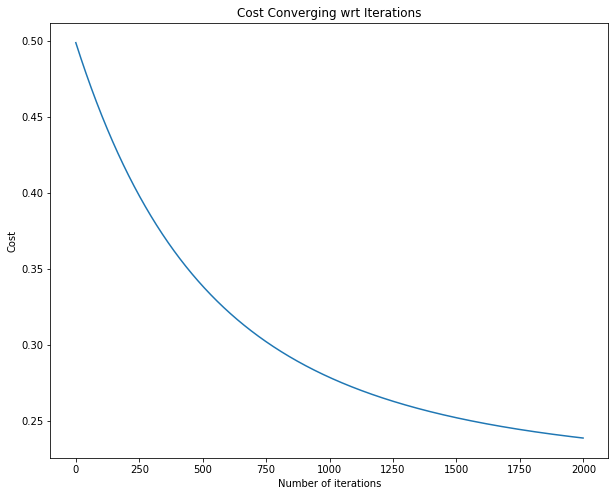

Test data MSE:  0.4776721345415939
Train data MSE:  0.4769363087232559
Test data R-squared:  0.5242265348964357
Train data R-squared:  0.5225870071461345


In [60]:
#alpha = 0.001
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,0.001)

Alpha: 0.005
The beta values are: [[ 4.13240949e-04  5.00518303e-01  3.94904525e-01  8.27421539e-02
  -3.93911612e-01 -3.79025918e-01  1.00242963e-03 -1.31018699e-03
  -1.35482415e-02 -1.42997634e-02 -4.02714457e-02 -6.06305001e-02
  -7.89946884e-03 -8.84339932e-02 -2.43616981e-02]]
The final value of cost function is: 0.22105959200415695
The value of cost function converges at: 1698


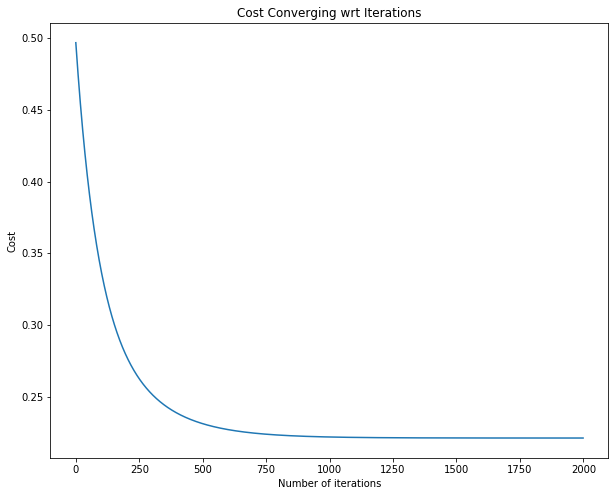

Test data MSE:  0.4428075654469661
Train data MSE:  0.4421191840083139
Test data R-squared:  0.5589525229706873
Train data R-squared:  0.5574389305763798


In [61]:
#alpha = 0.005
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,0.005)

Alpha: 0.01
The beta values are: [[ 4.15195167e-04  5.02029449e-01  3.96233251e-01  8.37052574e-02
  -3.95654604e-01 -3.80718358e-01  8.82079479e-04 -1.30996379e-03
  -1.35300278e-02 -1.58533432e-02 -4.16314992e-02 -6.06404830e-02
  -7.90482126e-03 -8.84169664e-02 -2.43418230e-02]]
The final value of cost function is: 0.2210556120515606
The value of cost function converges at: 914


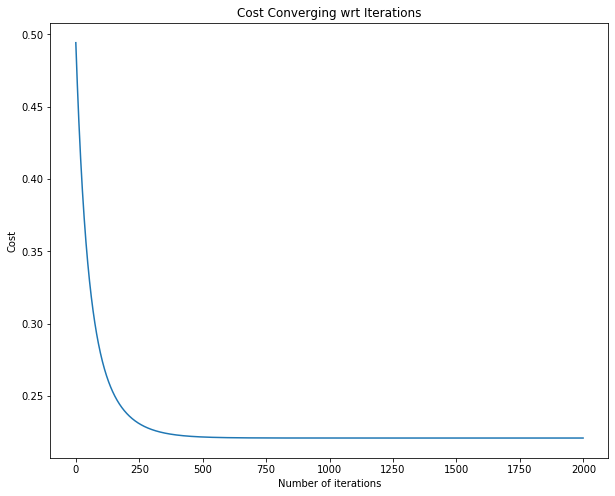

Test data MSE:  0.44280343777024683
Train data MSE:  0.4421112241031212
Test data R-squared:  0.5589566342405595
Train data R-squared:  0.5574468984372689


In [62]:
#alpha = 0.01
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,0.01)

Alpha: 0.05
The beta values are: [[ 4.15204142e-04  5.02038339e-01  3.96241041e-01  8.37098923e-02
  -3.95663395e-01 -3.80726855e-01  8.80555023e-04 -1.31074101e-03
  -1.35299340e-02 -1.58625051e-02 -4.16394896e-02 -6.06405266e-02
  -7.90484961e-03 -8.84168566e-02 -2.43417099e-02]]
The final value of cost function is: 0.2210556119321399
The value of cost function converges at: 212


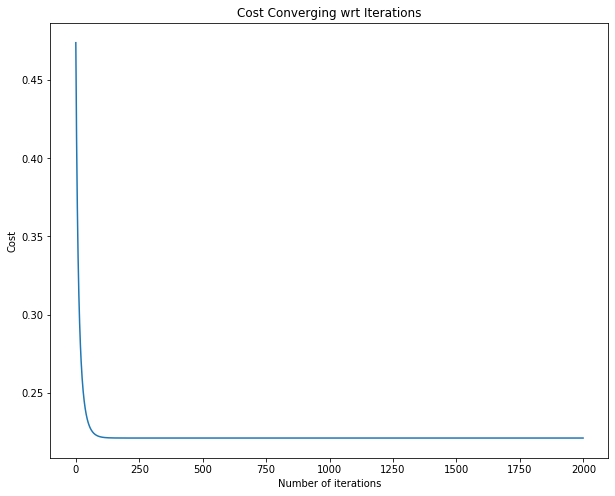

Test data MSE:  0.44280345558540324
Train data MSE:  0.4421112238642798
Test data R-squared:  0.5589566164962154
Train data R-squared:  0.557446898676349


In [63]:
#alpha = 0.05
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,0.05)

Alpha: 0.1
The beta values are: [[ 4.15204142e-04  5.02038339e-01  3.96241041e-01  8.37098923e-02
  -3.95663395e-01 -3.80726855e-01  8.80555023e-04 -1.31074101e-03
  -1.35299340e-02 -1.58625051e-02 -4.16394896e-02 -6.06405266e-02
  -7.90484961e-03 -8.84168566e-02 -2.43417099e-02]]
The final value of cost function is: 0.2210556119321399
The value of cost function converges at: 111


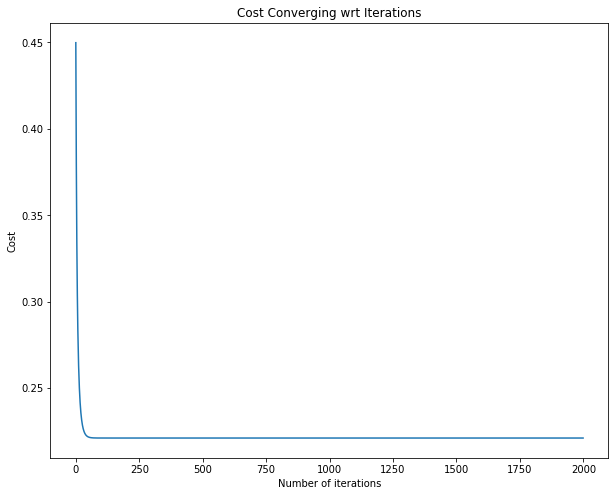

Test data MSE:  0.44280345558540324
Train data MSE:  0.4421112238642798
Test data R-squared:  0.5589566164962154
Train data R-squared:  0.557446898676349


In [64]:
#alpha = 0.1
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,0.1)

Alpha: 0.3
The beta values are: [[ 4.15204142e-04  5.02038339e-01  3.96241041e-01  8.37098923e-02
  -3.95663395e-01 -3.80726855e-01  8.80555023e-04 -1.31074101e-03
  -1.35299340e-02 -1.58625051e-02 -4.16394896e-02 -6.06405266e-02
  -7.90484961e-03 -8.84168566e-02 -2.43417099e-02]]
The final value of cost function is: 0.2210556119321399
The value of cost function converges at: 38


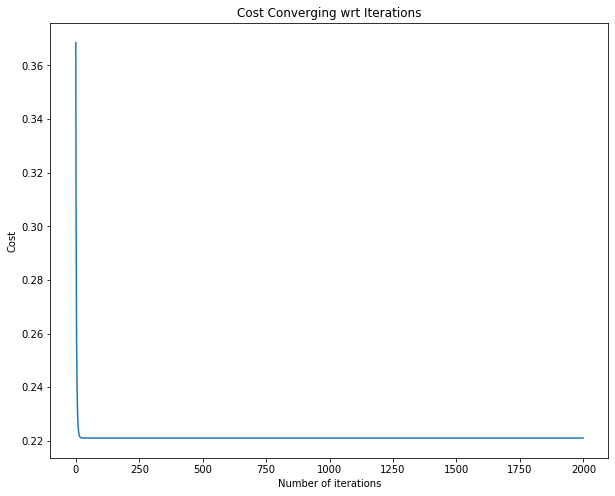

Test data MSE:  0.44280345558540324
Train data MSE:  0.4421112238642798
Test data R-squared:  0.5589566164962154
Train data R-squared:  0.557446898676349


In [65]:
#alpha = 0.3
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,0.3)

Alpha: 0.5
The beta values are: [[ 4.15204142e-04  5.02038339e-01  3.96241041e-01  8.37098923e-02
  -3.95663395e-01 -3.80726855e-01  8.80555023e-04 -1.31074101e-03
  -1.35299340e-02 -1.58625051e-02 -4.16394896e-02 -6.06405266e-02
  -7.90484961e-03 -8.84168566e-02 -2.43417099e-02]]
The final value of cost function is: 0.2210556119321399
The value of cost function converges at: 23


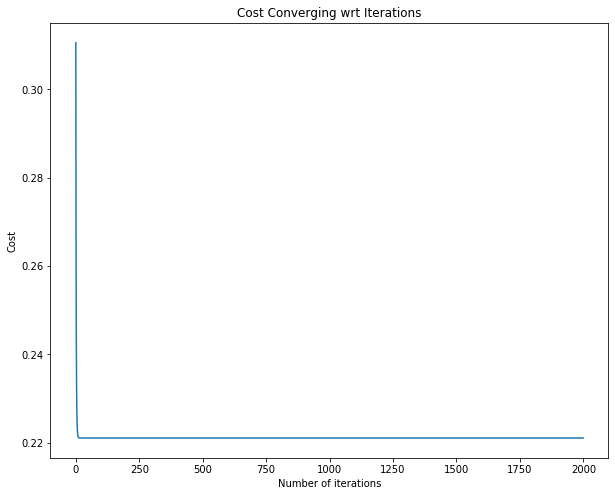

Test data MSE:  0.44280345558540324
Train data MSE:  0.4421112238642798
Test data R-squared:  0.5589566164962154
Train data R-squared:  0.557446898676349


In [66]:
#alpha = 0.5
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,0.5)

Alpha: 1
The beta values are: [[ 3.78772335e-04  5.00826576e-01  3.94449632e-01 -3.79475766e-01
  -3.64488220e-01 -1.46988488e-02 -3.98076689e-02 -6.05956467e-02
  -8.85050886e-02]]
The final value of cost function is: 0.2247875514349243
The value of cost function converges at: 9


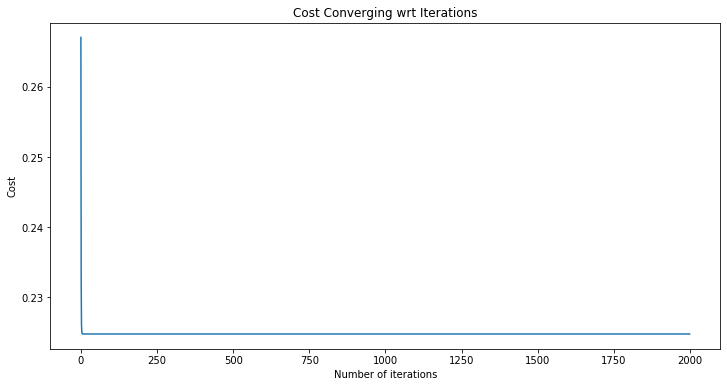

Test data MSE:  0.4497071432548304
Train data MSE:  0.4495751028698486
Test data R-squared:  0.5520803698681215
Train data R-squared:  0.5499755597382701


In [112]:
#alpha = 1
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,1)

Alpha: 1.3
The beta values are: [[ 4.15204142e-04  5.02038339e-01  3.96241041e-01  8.37098923e-02
  -3.95663395e-01 -3.80726855e-01  8.80555023e-04 -1.31074101e-03
  -1.35299340e-02 -1.58625051e-02 -4.16394896e-02 -6.06405266e-02
  -7.90484961e-03 -8.84168566e-02 -2.43417099e-02]]
The final value of cost function is: 0.2210556119321399
The value of cost function converges at: 37


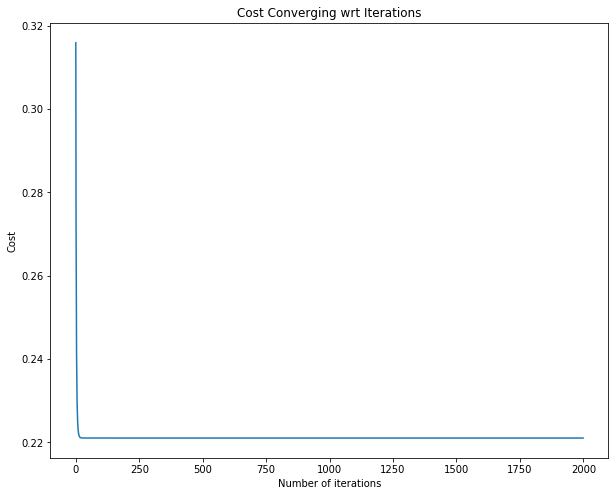

Test data MSE:  0.44280345558540324
Train data MSE:  0.4421112238642798
Test data R-squared:  0.5589566164962154
Train data R-squared:  0.557446898676349


In [68]:
#alpha = 1.3
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,1.3)

Alpha: 1.5
The beta values are: [[ 3.03831620e+109 -2.96668187e+110 -2.81748867e+110  1.27480922e+111
   2.29226655e+111  2.46702306e+111  3.52174032e+111  3.59171604e+111
   3.08886062e+109 -2.77141984e+111 -2.85361374e+111 -1.37020508e+108
   1.06329725e+109 -1.94999303e+108  1.36494223e+109]]
The final value of cost function is: 3.867536797091167e+223
The value of cost function converges at: 0


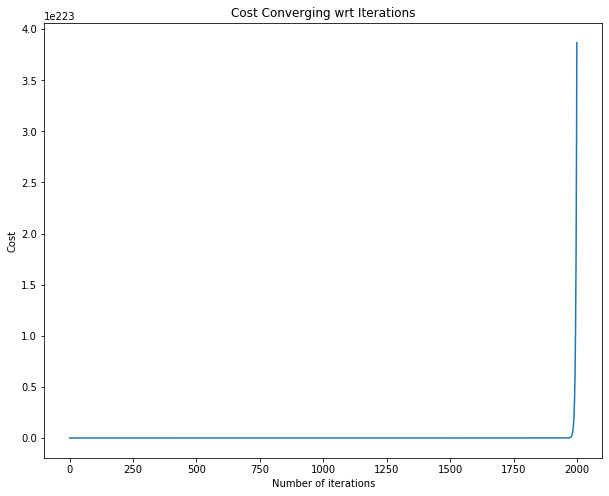

Test data MSE:  7.735193071422918e+223
Train data MSE:  7.735073594182333e+223
Test data R-squared:  -7.704446930670825e+223
Train data R-squared:  -7.742804577888135e+223


In [69]:
#alpha = 1.5
printResults(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,2000,1.5)

### Experiment 2 - Varying the values of convergence threshold

In [73]:
cvng_thresh = [0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001,0.00000000001,0.000000000001]
Test_MSE = []
Train_MSE = []
GD_iters = []
alpha = 0.05
for i in cvng_thresh:
    beta_cal,cost_cal,convg_cal = gradientDescentThresh(X_train_exp1,y_train_exp1,beta_strt,alpha,i)
    
    y_hat_test = predict(X_test_exp1,beta_cal)
    y_hat_train = predict(X_train_exp1,beta_cal)
    
    Test_MSE_i = calculateMSE(y_test_exp1,y_hat_test)
    Train_MSE_i = calculateMSE(y_train_exp1,y_hat_train)
    
    Test_MSE.append(Test_MSE_i)
    Train_MSE.append(Train_MSE_i)
    GD_iters.append(convg_cal)

Text(0.5, 1.0, 'Test Data MSE as a function of Threshold')

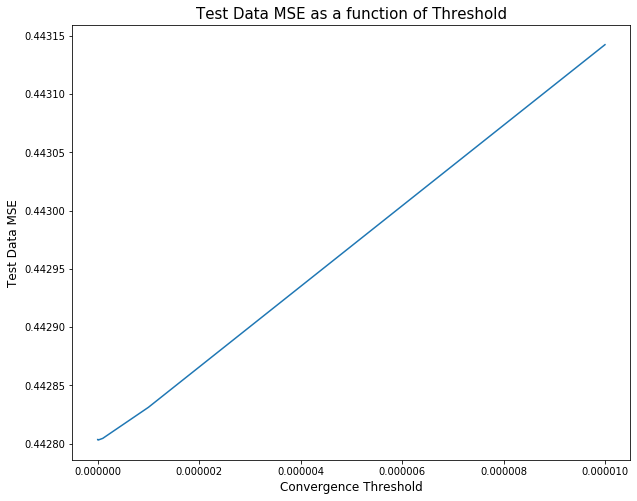

In [114]:
plt.plot(cvng_thresh, Test_MSE)
plt.xlabel('Convergence Threshold', fontsize=12)
plt.ylabel('Test Data MSE', fontsize=12)
plt.title('Test Data MSE as a function of Threshold', fontsize=15)

Text(0.5, 1.0, 'Train Data MSE as a function of Threshold')

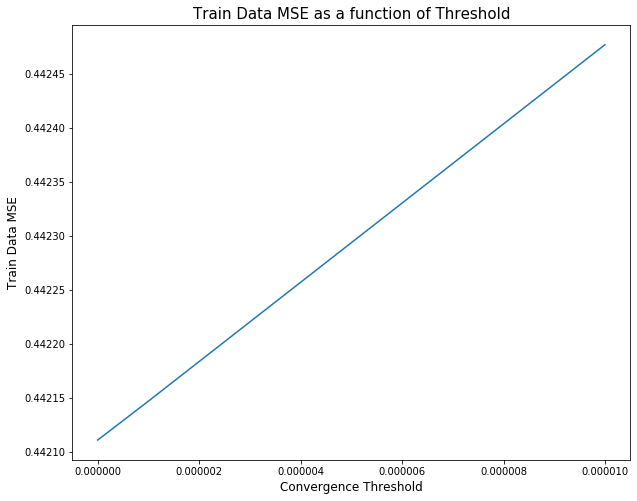

In [115]:
plt.plot(cvng_thresh, Train_MSE)
plt.xlabel('Convergence Threshold', fontsize=12)
plt.ylabel('Train Data MSE', fontsize=12)
plt.title('Train Data MSE as a function of Threshold', fontsize=15)

In [116]:
best_thresh = 0.0000001
alpha = 0.05
Test_err,Train_err,convg = gradientDescentItersMSE(X_train_exp1,y_train_exp1,X_test_exp1,y_test_exp1,beta_strt,
                                                     alpha,best_thresh)

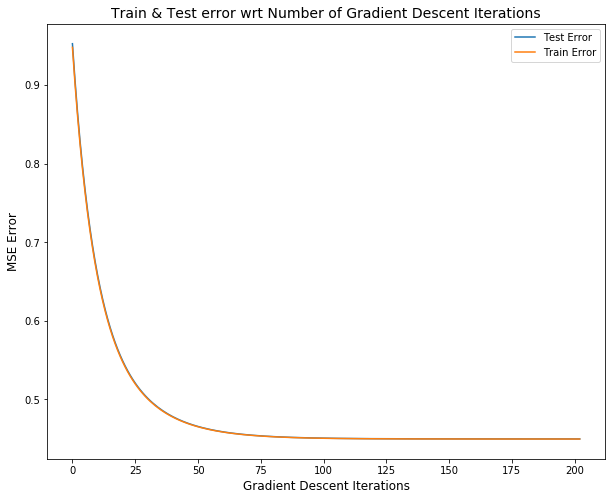

In [117]:
plt.plot(Test_err, label = "Test Error")
plt.plot(Train_err, label = "Train Error")
plt.xlabel('Gradient Descent Iterations', fontsize=12)
plt.ylabel('MSE Error', fontsize=12)
plt.title('Train & Test error wrt Number of Gradient Descent Iterations', fontsize=14)
plt.legend()
plt.show()

### Experiment 3 - Pick eight features randomly and retrain model

In [78]:
col_list = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']
rand_feature = random.sample(col_list, 8)

rand_feature_fnl = rand_feature + ['log_avg_run']
rand_feature_fnl

['NDIMB', 'STRM', 'MDIMC', 'VWN', 'KWG', 'KWI', 'VWM', 'MWG', 'log_avg_run']

In [79]:
#Normalize using StandardScaler function
sc_data = StandardScaler()
LineReg_rand = df[rand_feature_fnl]
LineReg_rand = sc_data.fit_transform(LineReg_rand)
LineReg_rand = pd.DataFrame(LineReg_rand)
LineReg_rand.columns = rand_feature_fnl
LineReg_rand.head()

,NDIMB,STRM,MDIMC,VWN,KWG,KWI,VWM,MWG,log_avg_run
0,-0.99807,-1.000017,-0.755071,-0.741098,-1.208972,-0.998011,-0.741098,-1.514916,0.125565
1,-0.99807,-1.000017,-0.755071,-0.741098,-1.208972,-0.998011,-0.741098,-1.514916,-0.223847
2,-0.99807,-1.000017,-0.755071,-0.741098,-1.208972,-0.998011,-0.741098,-1.514916,-0.202978
3,-0.99807,-1.000017,-0.755071,-0.741098,-1.208972,-0.998011,-0.741098,-1.514916,-0.138050
4,-0.99807,-1.000017,-0.755071,-0.741098,-1.208972,-0.998011,-0.741098,-1.514916,0.142995


In [80]:
#Setting the matrixes
X = LineReg_rand.iloc[:,0:8]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

Y = LineReg_rand.iloc[:,8:].values 
beta_strt = np.zeros([1,9])

print("Shape of Feature matrix:", X.shape)
print("Shape of Target matrix:", Y.shape)
print("Initial beta values:", beta_strt)

Shape of Feature matrix: (241120, 9)
Shape of Target matrix: (241120, 1)
Initial beta values: [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [81]:
#Splitting the data into training and test set
X_train_exp3,X_test_exp3,y_train_exp3,y_test_exp3 = train_test_split(X,Y,test_size = 0.2,random_state = 0)

Alpha: 0.05
The beta values are: [[-4.48183944e-04  1.66490999e-02 -6.00018712e-02 -3.09547746e-01
   1.51722148e-01  1.97014465e-02 -1.52553757e-02 -6.60990086e-03
   4.92180548e-01]]
The final value of cost function is: 0.33686354243249206
The value of cost function converges at: 180


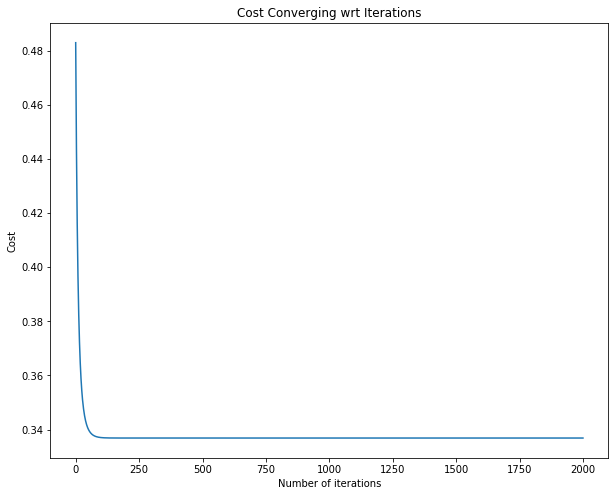

Test data MSE:  0.6763292893589419
Train data MSE:  0.6737270848649841
Test data R-squared:  0.3263590101228405
Train data R-squared:  0.3255995442805789


(0.6763292893589419, 0.6737270848649841)

In [82]:
#alpha = 0.05
printResults(X_train_exp3,y_train_exp3,X_test_exp3,y_test_exp3,beta_strt,2000,0.05)

### Experiment 4 -  Pick eight features that are best suited and retrain the model

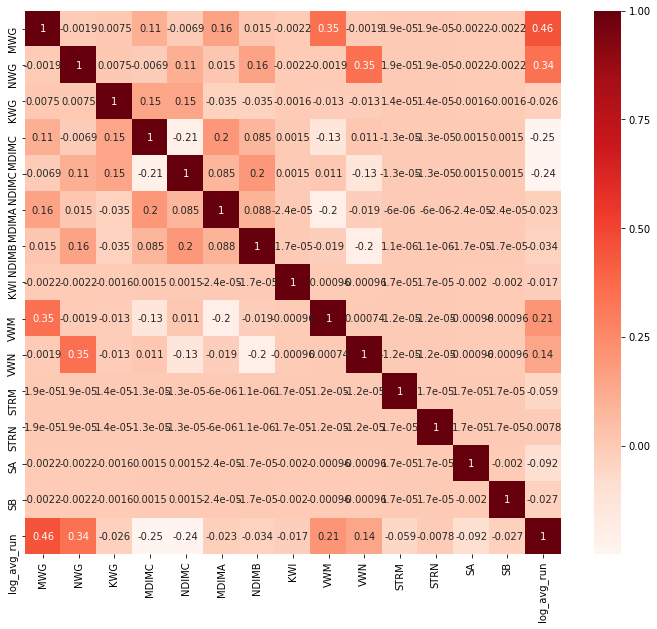

In [118]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [119]:
#Correlation with output variable
cor_target = abs(cor["log_avg_run"])
cor_target

# We can remove the variables with the least correlation with the target variable log_avg_run
# The least correlated variables are STRN 0.007790, KWI 0.011200, SB 0.020323, KWG 0.020358, MDIMA 0.023076 
# and NDIMB 0.033688

MWG            0.457038
NWG            0.343246
KWG            0.025607
MDIMC          0.249973
NDIMC          0.241250
MDIMA          0.023387
NDIMB          0.034082
KWI            0.017428
VWM            0.208979
VWN            0.143701
STRM           0.059342
STRN           0.007812
SA             0.091727
SB             0.026645
log_avg_run    1.000000
Name: log_avg_run, dtype: float64

In [85]:
sel_feature_fnl = ['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA', 'log_avg_run']

In [120]:
#Normalize using StandardScaler function
sc_data = StandardScaler()
LineReg_sel = df[sel_feature_fnl]
LineReg_sel = sc_data.fit_transform(LineReg_sel)
LineReg_sel = pd.DataFrame(LineReg_sel)
LineReg_sel.columns = sel_feature_fnl
LineReg_sel.head()

,MWG,NWG,MDIMC,NDIMC,VWM,VWN,STRM,SA,log_avg_run
0,-1.514916,-1.514916,-0.755071,-0.755071,-0.741098,-0.741098,-1.000017,-0.998011,0.125565
1,-1.514916,-1.514916,-0.755071,-0.755071,-0.741098,-0.741098,-1.000017,-0.998011,-0.223847
2,-1.514916,-1.514916,-0.755071,-0.755071,-0.741098,-0.741098,-1.000017,1.001993,-0.202978
3,-1.514916,-1.514916,-0.755071,-0.755071,-0.741098,-0.741098,-1.000017,1.001993,-0.138050
4,-1.514916,-1.514916,-0.755071,-0.755071,-0.741098,-0.741098,-1.000017,-0.998011,0.142995


In [121]:
#Setting the matrixes
X = LineReg_sel.iloc[:,0:8]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

Y = LineReg_sel.iloc[:,8:].values 
beta_strt = np.zeros([1,9])

print("Shape of Feature matrix:", X.shape)
print("Shape of Target matrix:", Y.shape)
print("Initial beta values:", beta_strt)

Shape of Feature matrix: (241120, 9)
Shape of Target matrix: (241120, 1)
Initial beta values: [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [122]:
#Splitting the data into training and test set
X_train_exp4,X_test_exp4,y_train_exp4,y_test_exp4 = train_test_split(X,Y,test_size = 0.2,random_state = 0)

Alpha: 0.05
The beta values are: [[ 3.78772335e-04  5.00826576e-01  3.94449632e-01 -3.79475766e-01
  -3.64488220e-01 -1.46988488e-02 -3.98076689e-02 -6.05956467e-02
  -8.85050886e-02]]
The final value of cost function is: 0.22478755143492427
The value of cost function converges at: 202


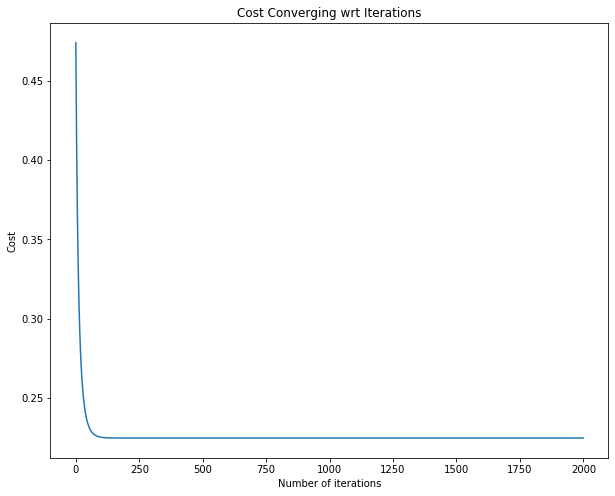

Test data MSE:  0.4497071432548303
Train data MSE:  0.44957510286984853
Test data R-squared:  0.5520803698681216
Train data R-squared:  0.5499755597382701


(0.4497071432548303, 0.44957510286984853)

In [123]:
#alpha = 0.05
printResults(X_train_exp4,y_train_exp4,X_test_exp4,y_test_exp4,beta_strt,2000,0.05)

## Logistic Regression

In [16]:
#Calculate Logistic regression cost
def calculateLogRegCost(X,Y,beta):
    y_pred = sigmoid(X,beta)
    class1 = np.asarray(Y.T) * np.log((y_pred))
    class2 = (1-Y).T * np.log((1-(y_pred)))
    finalCost = -(np.sum(class1 + class2)) / (len(X))
    return finalCost

In [17]:
def sigmoid(X,beta):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        y_pred[i] = 1 / (1 + math.exp(-(X[i] @ beta.T)))
    return y_pred

In [18]:
#Implement batch gradient descent with convergence threshold as 
def logRegGradientDescent(X,Y,beta,iters,alpha):
    cost = np.zeros(iters)
    diff = 1
    convg = 0
    for i in range(iters):
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost[i] = calculateLogRegCost(X, Y, beta)
        if diff > 0.0000001:    
            if i==0:
                diff = cost[i]
            else:
                diff = abs(cost[i] - cost[i-1])
                if diff <= 0.0000001:
                    convg = i
    return beta,cost,convg

In [19]:
#Implement batch gradient descent with convergence threshold as input
#Stopping the iterations when the threshold is achieved
def logRegGradientDescentThresh(X,Y,beta,alpha,thresh,iters=5000):
    cost = []
    diff = 1
    convg = 0
    while diff > thresh:
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost.append(calculateLogRegCost(X, Y, beta))
        if len(cost)==1:
            diff = cost[0]
        else:
            diff = abs(cost[-1] - cost[-2])
            if diff <= thresh:
                convg = len(cost)
    return beta,cost,convg

In [20]:
#Implement batch gradient descent with convergence threshold as input
#Stopping the iterations when the threshold is achieved
#Calculate Test and Train dataset Error at each iteration
def logRegGradientDescentItersMSE(X,Y,X_test,Y_test,beta,alpha,thresh,iters=5000):
    Test_err = []
    Train_err = []
    cost = []
    diff = 1
    convg = 0
    while diff > thresh:
        beta = beta - (alpha/len(X)) * np.sum(X * (X @ beta.T - Y), axis=0)
        cost.append(calculateLogRegCost(X, Y, beta))
        
        y_hat_test = logRegYPredict(X_test, beta, 0.5)
        y_hat_train = logRegYPredict(X, beta, 0.5)
        
        Test_err_i = 1-accuracy_score(y_hat_test , Y_test)
        Train_err_i = 1-accuracy_score(y_hat_train , Y)
        
        Test_err.append(Test_err_i)
        Train_err.append(Train_err_i)
        
        if len(cost)==1:
            diff = cost[0]
        else:
            diff = abs(cost[-1] - cost[-2])
            if diff <= thresh:
                convg = len(cost)
    return Test_err,Train_err,convg

In [21]:
def logRegYPredict(X,beta,threshold):
    y_pred = sigmoid(X,beta)
    y_pred_class = np.zeros(len(y_pred))
    for i in range(len(y_pred_class)):
        if y_pred[i] < threshold:
            y_pred_class[i] = 0
        elif y_pred[i] >= threshold:
            y_pred_class[i] = 1
    return y_pred_class

In [22]:
def CM_Accuracy(Y,Y_pred):
    cm = confusion_matrix(Y, Y_pred)
    acc = accuracy_score(Y_pred , Y)
    
    total=sum(sum(cm))
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", acc)
    print("Sensitivity :", sensitivity)
    print("Specificity :", specificity)
    return acc, sensitivity, specificity

In [23]:
def LogRegFeatureSel(df,a):
    if a == 'All':
        X_LogReg = df.iloc[:,0:14]
        ones = np.ones([X_LogReg.shape[0],1])
        X_LogReg = np.concatenate((ones,X_LogReg),axis=1)
        y_LogReg = df.iloc[:,14]
        beta_strt = np.zeros([1,15])
    else:
        if a == 'Rand':
            col_list = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']
            rand_feature = random.sample(col_list, 8)    
            rand_feature_fnl = rand_feature + ['log_avg_run']
            print("Random Feature List:",rand_feature_fnl)
            LogReg_feature = df[rand_feature_fnl]
        elif a == 'Sel':
            sel_feature_fnl = ['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA', 'log_avg_run']
            print("Selected Feature List:",sel_feature_fnl)
            LogReg_feature = df[sel_feature_fnl]
    
        X_LogReg = LogReg_feature.iloc[:,0:8]
        ones = np.ones([X_LogReg.shape[0],1])
        X_LogReg = np.concatenate((ones,X_LogReg),axis=1)
        y_LogReg = LogReg_feature.iloc[:,8]
        beta_strt = np.zeros([1,9])
    
    return X_LogReg, y_LogReg, beta_strt

In [24]:
def LogReg(threshold,featureSel):
    print("Threshold for classification:", threshold)
    
    #Checking for number of true values as per threshold
    true_false = df.log_avg_run > threshold
    values = true_false.value_counts()
    print(values)
    
    #Setting the matrixes
    X_LogReg,y_LogReg,beta_strt = LogRegFeatureSel(df,featureSel)
    
    #Convert the value above threshold to 1s and below threshold to 0s
    y_LogReg = y_LogReg.apply(lambda x : 0 if x <= threshold else 1)
    y_LogReg = pd.DataFrame(y_LogReg)
    y_LogReg = y_LogReg.values
    
    print("Shape of Feature matrix:", X_LogReg.shape)
    print("Shape of Target matrix:", y_LogReg.shape)
    print("Initial beta values:", beta_strt)
    
    #Train test split
    X_train_LogReg,X_test_LogReg,y_train_LogReg,y_test_LogReg = train_test_split(X_LogReg,y_LogReg,test_size = 0.2,random_state = 0)
    
    # Feature scaling
    sc_LogReg = StandardScaler()
    X_train_LogReg = sc_LogReg.fit_transform(X_train_LogReg)
    X_test_LogReg = sc_LogReg.transform(X_test_LogReg)
    
    return X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg, beta_strt

In [25]:
# Finding the threshold value for doing the classification
print(df.log_avg_run.describe())
print(df.log_avg_run.median())

count    241120.000000
mean          4.616241
std           1.119220
min           2.589079
25%           3.704814
50%           4.243124
75%           5.424887
max           7.999921
Name: log_avg_run, dtype: float64
4.243123698247448


In [26]:
#threshold = median = 4.243123698247448

thresh = 4.243123698247448
iters = 500
alpha = 0.1

X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg, beta_strt = LogReg(thresh,'All')
beta_cal,cost_cal,convg_cal = logRegGradientDescent(X_train_LogReg,y_train_LogReg,beta_strt,iters,alpha)

print("The beta values are:",beta_cal)
print("The final value of cost function is:", cost_cal[-1])
print("The value of cost function converges at:", convg_cal)

Threshold for classification: 4.243123698247448
False    120564
True     120556
Name: log_avg_run, dtype: int64
Shape of Feature matrix: (241120, 15)
Shape of Target matrix: (241120, 1)
Initial beta values: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
The beta values are: [[ 0.          0.22376987  0.13577909  0.02450951 -0.14350859 -0.12129405
  -0.00589895 -0.01021544 -0.00214302 -0.01047959 -0.02300229 -0.05153014
  -0.00476498 -0.06421056 -0.0131865 ]]
The final value of cost function is: 0.6156510317801702
The value of cost function converges at: 181


### Experiment 1 - Running the model with different  decision thresholds

In [27]:
#cutoff_thresh=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_thresh=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
Acc_test = []
Acc_train = []
sens_test = []
sens_train = []
spec_test = []
spec_train = []
for i in cutoff_thresh:
    print("Cutoff Threshold:",i)
    
    print("Train Dataset Results:")
    y_train_LogReg_pred = logRegYPredict(X_train_LogReg, beta_cal, i)
    trn_acc, trn_sens, trn_spec = CM_Accuracy(y_train_LogReg, y_train_LogReg_pred)
    trn_fpr = 1-trn_spec
    
    print("Test Dataset Results:")
    y_test_LogReg_pred = logRegYPredict(X_test_LogReg, beta_cal, i)
    tst_acc, tst_sens, tst_spec = CM_Accuracy(y_test_LogReg, y_test_LogReg_pred)
    tst_fpr = 1-tst_spec
    
    Acc_test.append(tst_acc)
    Acc_train.append(trn_acc)
    sens_test.append(tst_sens)
    sens_train.append(trn_sens)
    spec_test.append(tst_fpr)
    spec_train.append(trn_fpr)
    print("------------------------------------------------------------------")

Cutoff Threshold: 0.1
Train Dataset Results:
Confusion Matrix:
[[    0 96450]
 [    0 96446]]
Accuracy: 0.4999896317186463
Sensitivity : 0.0
Specificity : 1.0
Test Dataset Results:
Confusion Matrix:
[[    0 24114]
 [    0 24110]]
Accuracy: 0.49995852687458525
Sensitivity : 0.0
Specificity : 1.0
------------------------------------------------------------------
Cutoff Threshold: 0.2
Train Dataset Results:
Confusion Matrix:
[[    0 96450]
 [    0 96446]]
Accuracy: 0.4999896317186463
Sensitivity : 0.0
Specificity : 1.0
Test Dataset Results:
Confusion Matrix:
[[    0 24114]
 [    0 24110]]
Accuracy: 0.49995852687458525
Sensitivity : 0.0
Specificity : 1.0
------------------------------------------------------------------
Cutoff Threshold: 0.3
Train Dataset Results:
Confusion Matrix:
[[   58 96392]
 [   94 96352]]
Accuracy: 0.49980300265428
Sensitivity : 0.0006013478486262313
Specificity : 0.9990253613420982
Test Dataset Results:
Confusion Matrix:
[[   20 24094]
 [   27 24083]]
Accuracy: 0.4

Text(0.5, 1.0, 'ROC Curve for Train Data')

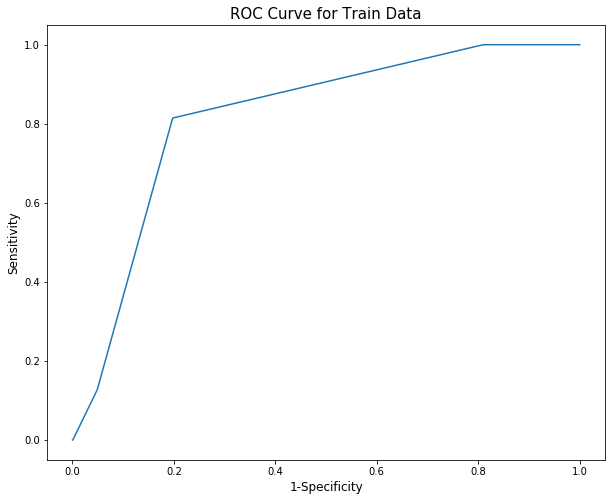

In [28]:
plt.plot(spec_train, sens_train)
plt.xlabel('1-Specificity', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.title('ROC Curve for Train Data', fontsize=15)

Text(0.5, 1.0, 'ROC Curve for Test Data')

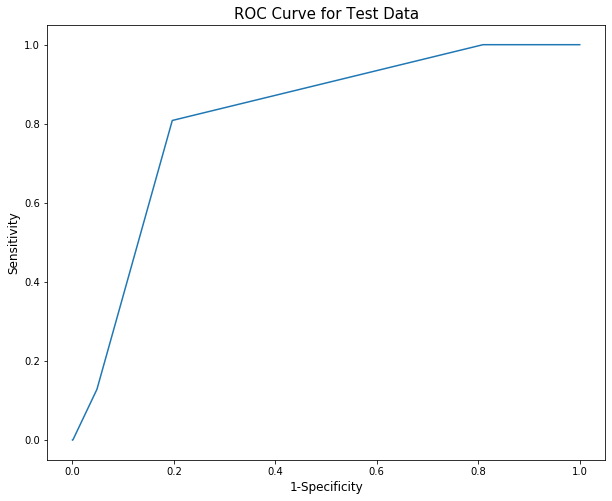

In [29]:
plt.plot(spec_test, sens_test)
plt.xlabel('1-Specificity', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.title('ROC Curve for Test Data', fontsize=15)

Text(0.5, 1.0, 'Test Data Accuracy wrt Decision Threshold')

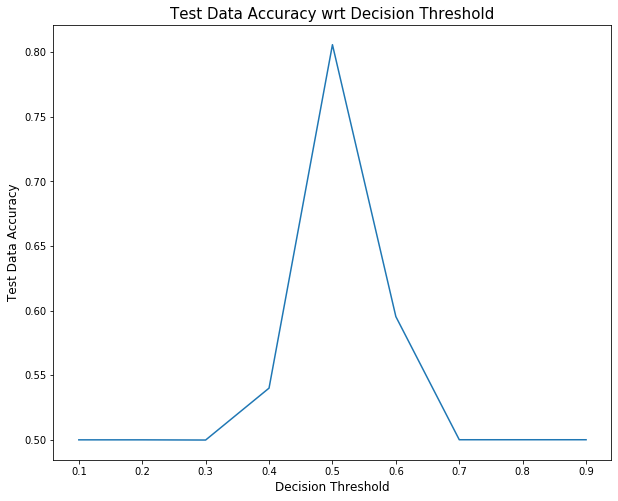

In [36]:
plt.plot(cutoff_thresh, Acc_test)
plt.xlabel('Decision Threshold', fontsize=12)
plt.ylabel('Test Data Accuracy', fontsize=12)
plt.title('Test Data Accuracy wrt Decision Threshold', fontsize=15)

Text(0.5, 1.0, 'Train Data Accuracy wrt Decision Threshold')

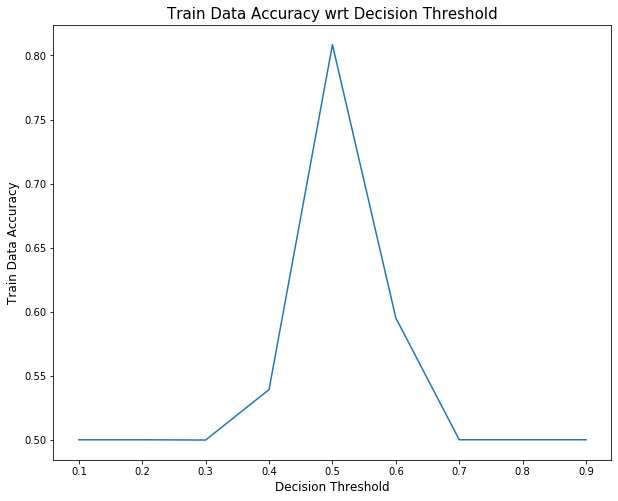

In [37]:
plt.plot(cutoff_thresh, Acc_train)
plt.xlabel('Decision Threshold', fontsize=12)
plt.ylabel('Train Data Accuracy', fontsize=12)
plt.title('Train Data Accuracy wrt Decision Threshold', fontsize=15)

### Experiment 2 - Varying the values of convergence threshold

In [32]:
cvng_thresh = [0.00001,0.000001,0.0000001,0.00000001,0.000000001,0.0000000001,0.00000000001,0.000000000001]
Test_err = []
Train_err = []
GD_iters = []
alpha = 0.1

for i in cvng_thresh:
    
    print("Convergence Threshold:",i)
    
    beta_cal,cost_cal,convg_cal = logRegGradientDescentThresh(X_train_LogReg,y_train_LogReg,beta_strt,alpha,i)
    
    print("Convergence Iteration:", convg_cal)
    print("Final Cost function:", cost_cal[-1])
    
    y_hat_test = logRegYPredict(X_test_LogReg, beta_cal, 0.5)
    y_hat_train = logRegYPredict(X_train_LogReg, beta_cal, 0.5)
    
    Test_err_i = 1-accuracy_score(y_hat_test , y_test_LogReg)
    Train_err_i = 1-accuracy_score(y_hat_train , y_train_LogReg)
    
    print("Test Error:",Test_err_i)
    print("Train error:",Train_err_i)
    
    Test_err.append(Test_err_i)
    Train_err.append(Train_err_i)
    GD_iters.append(convg_cal)
    print("------------------------------------------------------------------")

Convergence Threshold: 1e-05
Convergence Iteration: 95
Final Cost function: 0.6158313702606734
Test Error: 0.19438453881884543
Train error: 0.19187023059057728
------------------------------------------------------------------
Convergence Threshold: 1e-06
Convergence Iteration: 138
Final Cost function: 0.6156692823700398
Test Error: 0.19421864631718644
Train error: 0.19159028699402791
------------------------------------------------------------------
Convergence Threshold: 1e-07
Convergence Iteration: 182
Final Cost function: 0.6156527903708723
Test Error: 0.19426011944260124
Train error: 0.1915695504313205
------------------------------------------------------------------
Convergence Threshold: 1e-08
Convergence Iteration: 225
Final Cost function: 0.6156512108508754
Test Error: 0.19426011944260124
Train error: 0.19157473457199736
------------------------------------------------------------------
Convergence Threshold: 1e-09
Convergence Iteration: 268
Final Cost function: 0.61565105004

ValueError: x and y must have same first dimension, but have shapes (8,) and (203,)

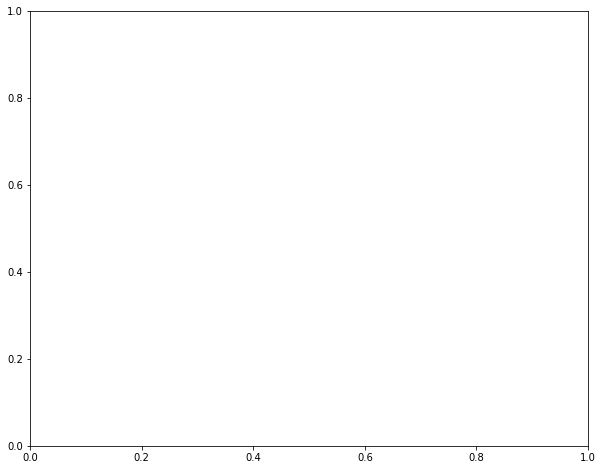

In [126]:
plt.plot(cvng_thresh, Test_err)
plt.xlabel('Convergence Threshold', fontsize=12)
plt.ylabel('Test Data Error', fontsize=12)
plt.title('Test Data Error as a function of Threshold', fontsize=15)

Text(0.5, 1.0, 'Train Data Error as a function of Threshold')

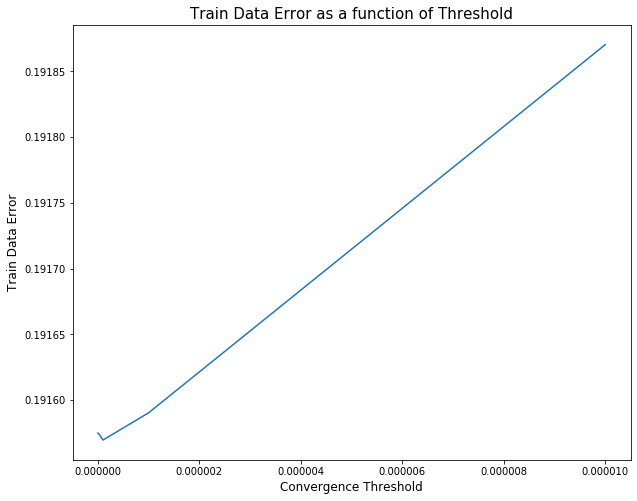

In [34]:
plt.plot(cvng_thresh, Train_err)
plt.xlabel('Convergence Threshold', fontsize=12)
plt.ylabel('Train Data Error', fontsize=12)
plt.title('Train Data Error as a function of Threshold', fontsize=15)

In [127]:
best_thresh = 0.0000001
alpha = 0.1
Test_err,Train_err,convg = logRegGradientDescentItersMSE(X_train_LogReg,y_train_LogReg,X_test_LogReg,y_test_LogReg,
                                                         beta_strt,alpha,best_thresh)

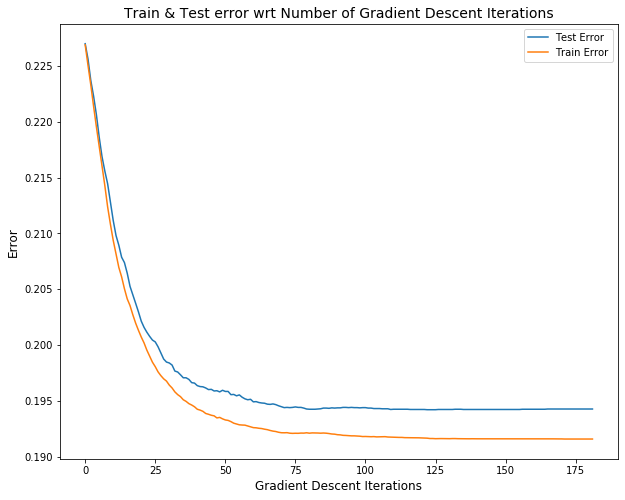

In [128]:
plt.plot(Test_err, label = "Test Error")
plt.plot(Train_err, label = "Train Error")
plt.xlabel('Gradient Descent Iterations', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Train & Test error wrt Number of Gradient Descent Iterations', fontsize=14)
plt.legend()
plt.show()

### Experiment 3 - Pick eight features randomly and retrain model

In [42]:
#threshold = median
thresh = 4.243123698247448
iters = 500
alpha = 0.1

X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg, beta_strt = LogReg(thresh,'Rand')
beta_cal,cost_cal,convg_cal = logRegGradientDescent(X_train_LogReg,y_train_LogReg,beta_strt,iters,alpha)

print("The beta values are:",beta_cal)
print("The final value of cost function is:", cost_cal[-1])
print("The value of cost function converges at:", convg_cal)

Threshold for classification: 4.243123698247448
False    120564
True     120556
Name: log_avg_run, dtype: int64
Random Feature List: ['NDIMB', 'VWM', 'KWG', 'VWN', 'NWG', 'KWI', 'MDIMC', 'STRM', 'log_avg_run']
Shape of Feature matrix: (241120, 9)
Shape of Target matrix: (241120, 1)
Initial beta values: [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
The beta values are: [[ 0.         -0.03041628  0.07640196 -0.00076566 -0.00695311  0.12056317
  -0.00259575 -0.07838399 -0.05162853]]
The final value of cost function is: 0.6664266414612013
The value of cost function converges at: 139


In [43]:
#Prediction threshold = 0.5
#Confusion matrix and accuracy score train dataset
print("For train dataset:")
y_train_LogReg_pred = logRegYPredict(X_train_LogReg, beta_cal, 0.5)
acc, se, sp = CM_Accuracy(y_train_LogReg, y_train_LogReg_pred)

print("------------------------------------------------------------------")

#Confusion matrix and accuracy score train dataset
print("For test dataset:")
y_test_LogReg_pred = logRegYPredict(X_test_LogReg, beta_cal, 0.5)
acc, se, sp = CM_Accuracy(y_test_LogReg, y_test_LogReg_pred)

For train dataset:
Confusion Matrix:
[[64081 32369]
 [33953 62493]]
Accuracy: 0.6561774220305242
Sensitivity : 0.6643960601347849
Specificity : 0.6479584430665865
------------------------------------------------------------------
For test dataset:
Confusion Matrix:
[[16058  8056]
 [ 8396 15714]]
Accuracy: 0.6588420703384207
Sensitivity : 0.6659202123247906
Specificity : 0.6517627540439651


### Experiment 4 - Pick eight features that are best suited and retrain the model

In [44]:
#threshold = median
thresh = 4.243123698247448
iters = 500
alpha = 0.1

X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg, beta_strt = LogReg(thresh,'Sel')
beta_cal,cost_cal,convg_cal = logRegGradientDescent(X_train_LogReg,y_train_LogReg,beta_strt,iters,alpha)

print("The beta values are:",beta_cal)
print("The final value of cost function is:", cost_cal[-1])
print("The value of cost function converges at:", convg_cal)

Threshold for classification: 4.243123698247448
False    120564
True     120556
Name: log_avg_run, dtype: int64
Selected Feature List: ['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWM', 'VWN', 'STRM', 'SA', 'log_avg_run']
Shape of Feature matrix: (241120, 9)
Shape of Target matrix: (241120, 1)
Initial beta values: [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
The beta values are: [[ 0.          0.22194826  0.13291724 -0.14098149 -0.11888046 -0.00845889
  -0.0198325  -0.05151535 -0.06420746]]
The final value of cost function is: 0.6164928317896797
The value of cost function converges at: 172


In [45]:
#Prediction threshold = 0.5
#Confusion matrix and accuracy score train dataset
print("For train dataset:")
y_train_LogReg_pred = logRegYPredict(X_train_LogReg, beta_cal, 0.5)
acc, se, sp = CM_Accuracy(y_train_LogReg, y_train_LogReg_pred)

print("------------------------------------------------------------------")

#Confusion matrix and accuracy score train dataset
print("For test dataset:")
y_test_LogReg_pred = logRegYPredict(X_test_LogReg, beta_cal, 0.5)
acc, se, sp = CM_Accuracy(y_test_LogReg, y_test_LogReg_pred)

For train dataset:
Confusion Matrix:
[[78551 17899]
 [19099 77347]]
Accuracy: 0.8081971632382217
Sensitivity : 0.8144219803006739
Specificity : 0.8019720880077971
------------------------------------------------------------------
For test dataset:
Confusion Matrix:
[[19504  4610]
 [ 4750 19360]]
Accuracy: 0.8059057730590578
Sensitivity : 0.8088247491084017
Specificity : 0.8029863127333057
